## Convolution Kernels

In [1]:
import numpy as np                     
import matplotlib.pyplot as plt       
import tensorflow as tf                

In [2]:
def conv_2d(A, kernel):
    output = np.zeros([A.shape[0] - kernel.shape[0] + 1,
                       A.shape[1] - kernel.shape[0] + 1])
    for row in range(1, A.shape[0] - 1):
        for column in range(1, A.shape[1] - 1):
            output[row - 1, column - 1] = np.tensordot(A[row - 1 : row + 2, column - 1 : column + 2], kernel)
    return output

In [3]:
a = np.zeros((11, 11))
a[3 : 8, :] = 1
a

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [4]:
kernel_h = np.array([1, 1, 1, 
                     0, 0, 0, 
                     -1, -1, -1]).reshape(3, 3)
kernel_h

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

In [5]:
conv_2d(a, kernel_h)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-3., -3., -3., -3., -3., -3., -3., -3., -3.],
       [-3., -3., -3., -3., -3., -3., -3., -3., -3.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [6]:
a = np.zeros((11, 11))
a

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [7]:
conv_2d(a, kernel_h)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

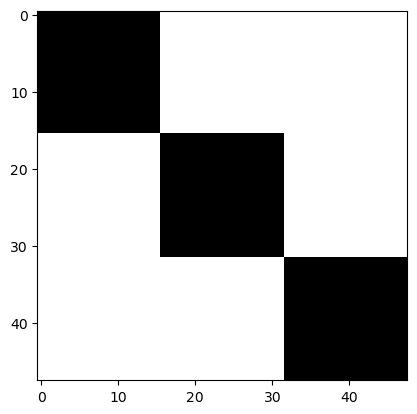

In [8]:
img_np = np.zeros((48, 48), dtype = np.uint8)
for i in range(3):
    img_np[i * 16 : i * 16 + 16, i * 16 : i  * 16 + 16] = 1

plt.imshow(img_np, cmap = plt.cm.binary)

In [9]:
output_1 = conv_2d(img_np, kernel_h)

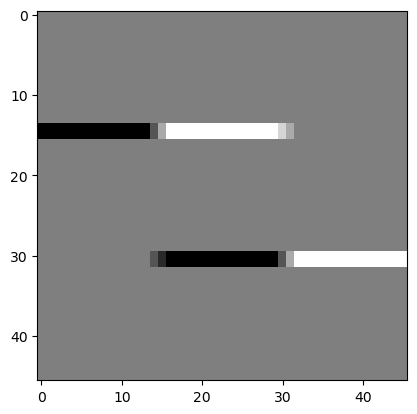

In [10]:
plt.imshow(output_1, cmap = plt.cm.binary)

### Vertical Detection

In [11]:
kernel_v = np.array([1, 0, -1, 
                     1, 0, -1, 
                     1, 0, -1]).reshape(3, 3)
kernel_v

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

In [12]:
output_2 = conv_2d(img_np, kernel_v)

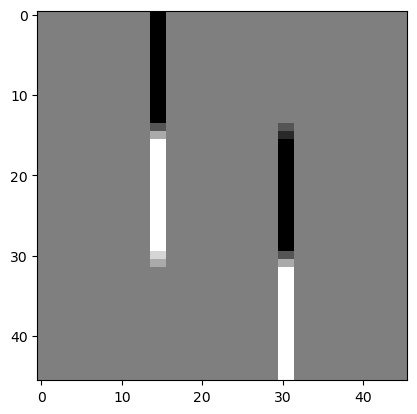

In [13]:
plt.imshow(output_2, cmap = plt.cm.binary)

### Edge Detection

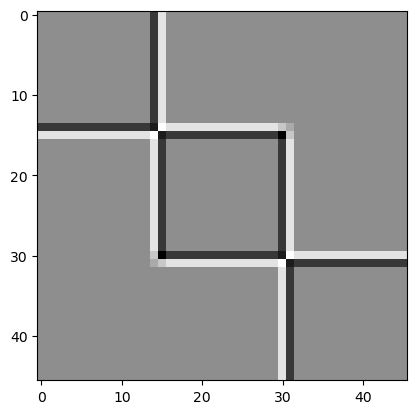

In [14]:
kernel_e = np.array([-1, -1, -1, 
                     -1, 8, -1, 
                     -1, -1, -1]).reshape(3, 3)
output_3 = conv_2d(img_np, kernel_e)
plt.imshow(output_3, cmap = plt.cm.binary)

### Gaussian Blurring

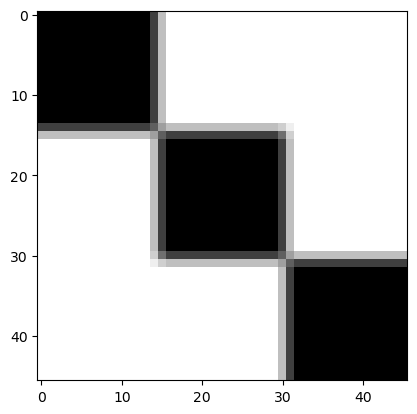

In [15]:
kernel_gb = 1/16 * np.array([1, 2, 1, 
                             2, 4, 2, 
                             1, 2, 1]).reshape(3, 3)
output_4 = conv_2d(img_np, kernel_gb)
plt.imshow(output_4, cmap = plt.cm.binary)

### Learning a Kernel

In [ ]:
X = tf.convert_to_tensor(img_np, dtype = tf.float32)
X

In [ ]:
Y = tf.convert_to_tensor(output_1, dtype = tf.float32)
Y

In [ ]:
conv2d = tf.keras.layers.Conv2D(1, (3, 3), use_bias = False)

In [ ]:
X = tf.reshape(X, (1, 48, 48, 1))

In [ ]:
Y = tf.reshape(Y, (1, 46, 46, 1))

In [ ]:
Y_hat = conv2d(X)

In [ ]:
conv2d.get_weights()[0]

In [ ]:
lr = 1e-5 
for i in range(1000):
    with tf.GradientTape() as g:
        Y_hat = conv2d(X)
        l = (abs(Y_hat - Y))**2
        update = tf.multiply(lr, g.gradient(l, conv2d.weights[0]))
        weights = conv2d.get_weights()
        weights[0] = conv2d.weights[0] - update
        conv2d.set_weights(weights)
        if (i + 1) % 100 == 0:
            print(f'iteration {i + 1}, loss {tf.reduce_sum(l):.3f}')

In [ ]:
tf.reshape(conv2d.get_weights()[0], (3, 3))

### Multiple Input and Multiple Output Channels

In [ ]:
img_np_rgb = np.zeros((48, 48, 3), dtype = np.uint8)
for i in range(3):
    img_np_rgb[i * 16 : i * 16 + 16, i * 16 : i  * 16 + 16, i] = 255

plt.imshow(img_np_rgb)

In [ ]:
kernel_rgb = np.array([kernel_v, kernel_h, kernel_e])
kernel_rgb

In [ ]:
rgb = np.array([img_np_rgb[:, :, _] for _ in range(3)])
rgb

In [ ]:
def conv_2d_multi_in(A, kernel):
    rgb = np.array([A[:, :, _] for _ in range(3)])
    res = np.stack([conv_2d(a, k) for a, k in zip(rgb, kernel)], axis = -1)
    return(res)

In [ ]:
output_rgb = conv_2d_multi_in(img_np_rgb, kernel_rgb)

In [ ]:
output_rgb.shape

In [ ]:
output_rgb[12:16, :, :]

In [ ]:
output_rgb[output_rgb < 0] = 255
output_rgb[output_rgb > 0] = 255
output_rgb = output_rgb.astype(np.uint8)

In [ ]:
plt.imshow(output_rgb)

## Padding and Stride

In [ ]:
X.shape

In [ ]:
conv2d = tf.keras.layers.Conv2D(filters = 1, 
                                kernel_size = (3, 3), 
                                kernel_initializer = tf.keras.initializers.Constant(kernel_v), 
                                input_shape = (48, 48, 1),
                                use_bias = False)

In [ ]:
Y = conv2d(X)

In [ ]:
Y.shape

In [ ]:
plt.imshow(Y.numpy()[0, :, :, 0], cmap = plt.cm.binary)

In [ ]:
conv2d = tf.keras.layers.Conv2D(filters = 1, 
                                kernel_size = (3, 3), 
                                kernel_initializer = tf.keras.initializers.Constant(kernel_v),
                                padding = 'same',
                                input_shape = (48, 48, 1),
                                use_bias = False)

In [ ]:
Y = conv2d(X)

In [ ]:
Y.shape

In [ ]:
plt.imshow(Y.numpy()[0, :, :, 0], cmap = plt.cm.binary)

### Effect of Filter Size (Kernel Size)

In [ ]:
kernel_v = np.array([1, 0, 0, 0, -1, 
                     1, 0, 0, 0, -1, 
                     1, 0, 0, 0, -1,
                     1, 0, 0, 0, -1,
                     1, 0, 0, 0, -1]).reshape(5, 5)
kernel_v
conv2d = tf.keras.layers.Conv2D(filters = 1, 
                                kernel_size = (5, 5), 
                                kernel_initializer = tf.keras.initializers.Constant(kernel_v),
                                padding = 'same',
                                input_shape = (48, 48, 1),
                                use_bias = False)

In [ ]:
Y = conv2d(X)

In [ ]:
plt.imshow(Y.numpy()[0, :, :, 0], cmap = plt.cm.binary)

In [ ]:
kernel_v = np.array([1, 0, -1, 
                     1, 0, -1, 
                     1, 0, -1]).reshape(3, 3)

conv2d = tf.keras.layers.Conv2D(filters = 1, 
                                kernel_size = (3, 3), 
                                kernel_initializer = tf.keras.initializers.Constant(kernel_v),
                                padding = 'same',
                                strides = (2, 2),
                                input_shape = (48, 48),
                                use_bias = False)

In [ ]:
Y = conv2d(X)

In [ ]:
plt.imshow(Y.numpy()[0, :, :, 0], cmap = plt.cm.binary)

## Convolution Operation on Images

In [ ]:
from PIL import Image
img = Image.open('Azadi_Tower.jpg')
img

In [ ]:
img.size

In [ ]:
img_graysc = img.convert('L')

In [ ]:
img_np = np.asarray(img_graysc)
plt.imshow(img_np, cmap = 'gray')

In [ ]:
img_np.shape

In [ ]:
X = tf.convert_to_tensor(img_np, dtype = tf.float32)
X = tf.reshape(X, (1, 2268, 4032, 1))
X.shape

In [ ]:
kernel_v = np.array([1, 0, -1,  
                     1, 0, -1,  
                     1, 0, -1]).reshape(3, 3)

In [ ]:
conv2d = tf.keras.layers.Conv2D(filters = 1, 
                                kernel_size = (3, 3), 
                                kernel_initializer = tf.keras.initializers.Constant(kernel_v),
                                padding = 'same',
                                input_shape = (2268, 4032, 1),
                                use_bias = False)

In [ ]:
Y = conv2d(X)

In [ ]:
plt.imshow(Y.numpy()[0, :, :, 0], cmap = 'gray')

In [ ]:
kernel_v = np.array([1, 0, 0, 0, -1, 
                     1, 0, 0, 0, -1, 
                     1, 0, 0, 0, -1,
                     1, 0, 0, 0, -1,
                     1, 0, 0, 0, -1]).reshape(5, 5)

In [ ]:
conv2d = tf.keras.layers.Conv2D(filters = 1, 
                                kernel_size = (5, 5), 
                                kernel_initializer = tf.keras.initializers.Constant(kernel_v),
                                padding = 'same',
                                input_shape = (2268, 4032, 1),
                                use_bias = False)

In [ ]:
Y = conv2d(X)

In [ ]:
plt.imshow(Y.numpy()[0, :, :, 0], cmap = 'gray')

In [ ]:
conv2d = tf.keras.layers.Conv2D(filters = 1, 
                                kernel_size = (3, 3), 
                                kernel_initializer = tf.keras.initializers.Constant(kernel_h),
                                padding = 'same',
                                input_shape = (2268, 4032, 1),
                                use_bias = False)

In [ ]:
Y = conv2d(X)

In [ ]:
plt.imshow(Y.numpy()[0, :, :, 0], cmap = 'gray')

### Box Blurring

In [ ]:
kernel_bb = 1/(21 * 21) * np.ones((21, 21), dtype = np.uint8)
conv2d = tf.keras.layers.Conv2D(filters = 1, 
                                kernel_size = (21, 21), 
                                kernel_initializer = tf.keras.initializers.Constant(kernel_bb),
                                padding = 'same',
                                input_shape = (2268, 4032, 1),
                                use_bias = False)

In [ ]:
Y = conv2d(X)

In [ ]:
plt.imshow(Y.numpy()[0, :, :, 0], cmap = 'gray')

# CNN on MNIST Dataset

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

In [ ]:
X_train.shape

In [ ]:
X_train[0]

In [ ]:
plot = plt.figure(figsize = (12, 10))
plot.subplots_adjust(hspace = 0.3, wspace = 0.3)
for i in range(20):
    a = plot.add_subplot(4, 5, i + 1)
    a.imshow(X_train[i], cmap = plt.cm.binary)
    a.title.set_text(y_train[i])

## Biuld a Baseline Model (ANN)

#### Data Preparation for ANN

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
X_train_ann = X_train.reshape(-1, 28 * 28)
X_test_ann  = X_test.reshape(-1, 28 * 28)

In [ ]:
X_train_ann.shape

In [ ]:
X_train_ann = X_train_ann / 255
X_test_ann  = X_test_ann / 255

In [ ]:
X_train_ann[0]

In [ ]:
X_train[0]

In [ ]:
from tensorflow.keras.utils import to_categorical 
y_train = to_categorical(y_train, num_classes = 10)
y_test  = to_categorical(y_test, num_classes = 10) 

In [ ]:
y_train[0]

In [ ]:
y_train.shape

In [ ]:
y_test[0]

In [ ]:
y_test.shape

In [ ]:
from tensorflow import keras
model_ann = keras.Sequential()
model_ann.add(keras.layers.Dense(100, input_dim = 28 * 28 , activation = "relu",
                                kernel_initializer = 'he_uniform'))  
model_ann.add(keras.layers.Dense(10, activation = "softmax"))        
model_ann.summary() 

In [ ]:
model_ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model_ann.fit(X_train_ann, y_train, epochs = 10, batch_size = 128, validation_split = 0.3)

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(model_ann.history.history['loss'], label = 'train')
plt.plot(model_ann.history.history['val_loss'], alpha = 0.7, label = 'test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('ANN Model: Loss - Epochs')

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(model_ann.history.history['accuracy'], label = 'train')
plt.plot(model_ann.history.history['val_accuracy'], alpha = 0.7, label = 'test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('ANN Model: Accuracy - Epochs')

In [ ]:
model_ann.evaluate(X_test_ann, y_test)

In [ ]:
y_pred_ann = model_ann.predict(X_test_ann)

In [ ]:
l = []
for i in range(len(y_test)) :
    l.append(np.argmax(y_test[i]))

In [ ]:
l

In [ ]:
pl_ann = []
for i in range(len(y_pred_ann)):
    pl_ann.append(np.argmax(y_pred_ann[i]))

In [ ]:
pl_ann

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(l, pl_ann)

## Biuld the CNN Model

#### Data Preparation for CNN

In [ ]:
X_train.shape

In [ ]:
X_train_cnn = X_train.reshape(-1,28, 28, 1)
X_test_cnn  = X_test.reshape(-1, 28, 28, 1)

In [ ]:
X_train_cnn = X_train_cnn / 255
X_test_cnn  = X_test_cnn / 255

In [ ]:
X_train_cnn.shape

In [ ]:
X_train_cnn[0]

In [ ]:
model_cnn = keras.models.Sequential()
model_cnn.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', 
              kernel_initializer = 'he_uniform', input_shape = (28, 28, 1)))
model_cnn.add(keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
model_cnn.add(keras.layers.Dense(10, activation = 'softmax'))
model_cnn.summary()

In [ ]:
model_cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model_cnn.fit(X_train_cnn, y_train, epochs = 10, batch_size = 128, validation_split = 0.3)

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(model_cnn.history.history['loss'], label = 'train')
plt.plot(model_cnn.history.history['val_loss'], alpha = 0.7, label = 'test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('CNN Model: Loss - Epochs')

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(model_cnn.history.history['accuracy'], label = 'train')
plt.plot(model_cnn.history.history['val_accuracy'], alpha = 0.7, label = 'test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('CNN Model: Accuracy - Epochs')

In [ ]:
model_cnn.evaluate(X_test_cnn, y_test)

In [ ]:
y_pred_cnn = model_cnn.predict(X_test_cnn)

In [ ]:
pl_cnn = []
for i in range(len(y_pred_cnn)):
    pl_cnn.append(np.argmax(y_pred_cnn[i]))

In [ ]:
pl_cnn

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(l, pl_cnn)